In [1]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO
from tqdm import tqdm

from notebook.services.config import ConfigManager
import matplotlib.animation as animation

#%matplotlib notebook
%matplotlib inline


c = ConfigManager()
c.update('notebook', {"CodeCell": {"cm_config": {"autoCloseBrackets": False}}})

{'CodeCell': {'cm_config': {'autoCloseBrackets': False}},
 'load_extensions': {'vim_binding/vim_binding': True}}

# Picture colors evolution according to diffusion

making request
got image with size (1122, 750, 3)


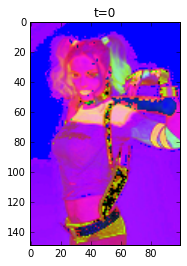

In [2]:
def get_image(url):
    print("making request")
    r = requests.get(url)
    strio = BytesIO(r.content)
    i = Image.open(strio)
    print("got image with size %s"%str(np.array(i).shape))
    return i
t_steps = 200   # time dim size
dx = 0.4
dt = 0.12
D =  0.07 #diff coef
# ini func via Heaviside
#image = get_image('https://upload.wikimedia.org/wikipedia/commons/a/ad/UHS-II.png')
#image = get_image('https://www.codeproject.com/KB/GDI-plus/ImageProcessing2/img.jpg')
#image = get_image('https://pp.userapi.com/c841423/v841423929/6fd2d/Az8-G8SC79A.jpg')
image = get_image('https://i2.wp.com/superheronews.com/wp-content/uploads/2017/01/Margot-Robbie-Harley-Quinn.jpg')
#image = get_image('https://i.stack.imgur.com/L2JWp.png')
basewidth = 100
wpercent = (basewidth/float(image.size[0]))
hsize = int((float(image.size[1])*float(wpercent)))
image = image.resize((basewidth,hsize), Image.ANTIALIAS)
image = image.convert('HSV')

U0 = np.array(image)
#U0 = np.mean(U0,axis=-1)
shape = U0.shape

#init 'heater'
"""
H = np.zeros(x_size)
H[x_size//2-2:x_size//2+7]=0.03
H[x_size//4+5:x_size//3+19]-=0.02
#H/=(2*U0+1.)
H-=0.06
"""
    
plt.imshow(U0,label='inital distr')
plt.title('t=0')
plt.show()

In [3]:

# init with U0
U_ti = U0.astype(np.float)
U = [U_ti]
maxs = [np.max(U_ti)]

for ti in tqdm(range(t_steps)):
    U_next = np.zeros(shape)
    # pad torus-like
    U_ti = np.concatenate(([U_ti[-1]], U_ti, [U_ti[0]] ))    
    if len(shape)==2:
        U_ti = np.concatenate((U_ti[:,-1,][:,np.newaxis], U_ti, U_ti[:,0][:,np.newaxis] ),axis=1)    
    elif len(shape)==3:
        U_ti = np.concatenate((U_ti[:,-1,][:,np.newaxis,:], U_ti, U_ti[:,0][:,np.newaxis,:] ),axis=1)    
        
    for xi in range(1,shape[0]+1):
        for yi in range(1,shape[1]+1):
            # step!
            tt = dt/dx* D*( U_ti[xi-1][yi]
                           +U_ti[xi+1][yi]
                           +U_ti[xi][yi-1]
                           +U_ti[xi][yi+1]
                           -4*U_ti[xi][yi] 
                          ) + U_ti[xi][yi]  #dt*H[xi]
            U_next[xi-1][yi-1]=tt
    U_ti = np.array(U_next)
    maxs.append(np.max(U_ti))

    #print(max(U_ti),U_ti.shape)
    U.append(U_ti)

    

100%|██████████| 200/200 [00:26<00:00,  7.67it/s]


255.0


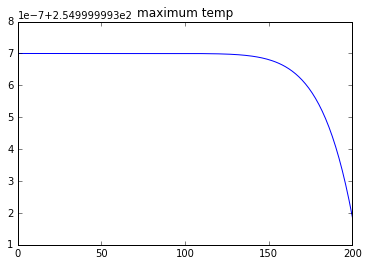

In [4]:
U = np.array(U)/np.max(maxs)*255
print(np.max(U))
U=U.astype(np.int)
plt.plot(maxs)
plt.title('maximum temp')
plt.show()

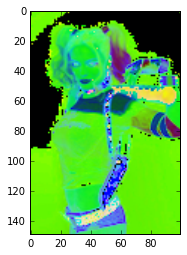

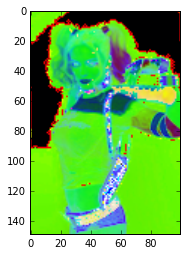

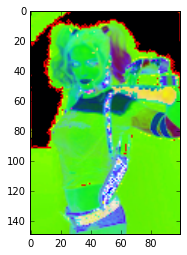

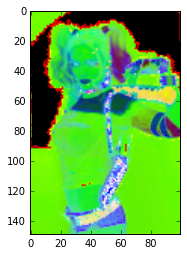

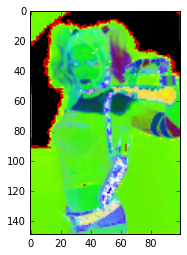

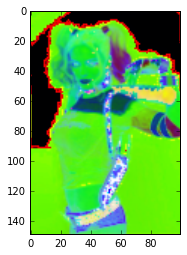

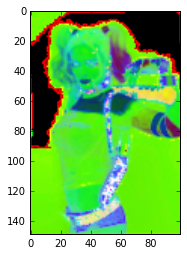

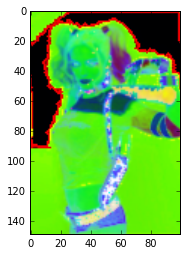

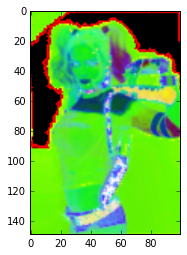

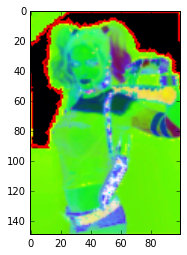

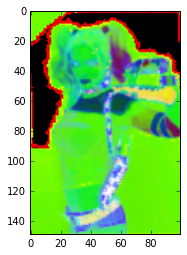

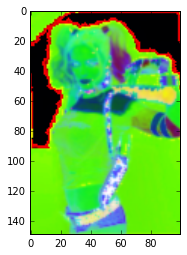

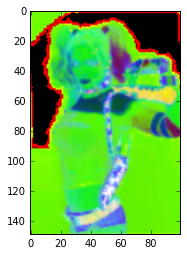

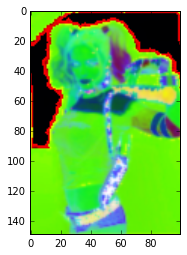

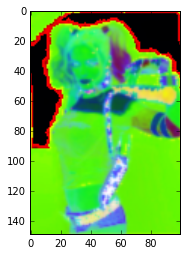

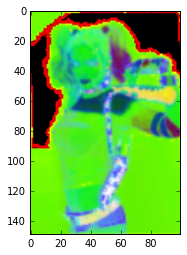

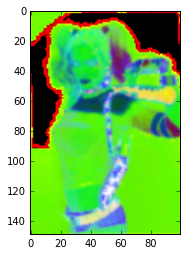

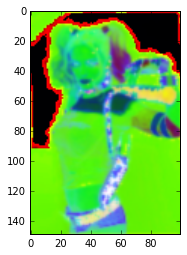

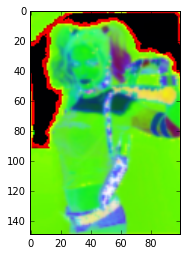

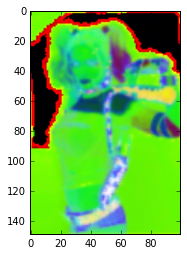

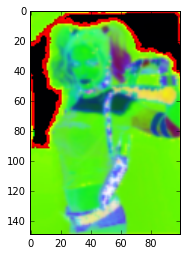

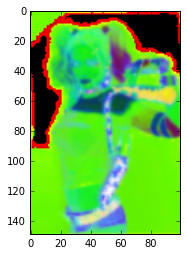

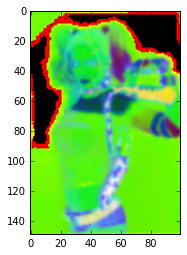

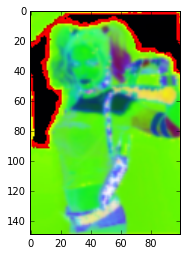

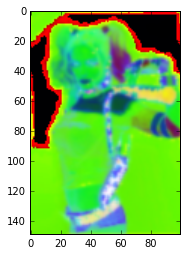

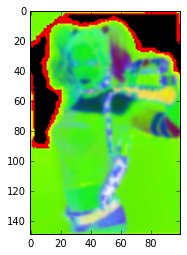

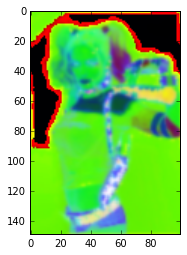

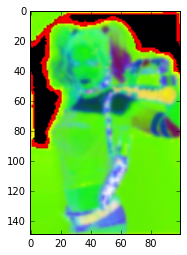

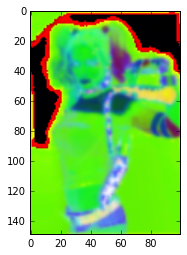

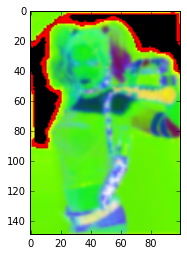

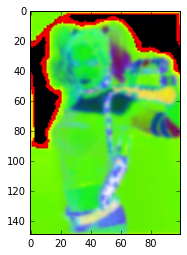

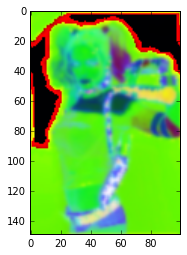

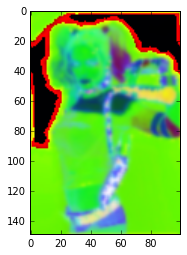

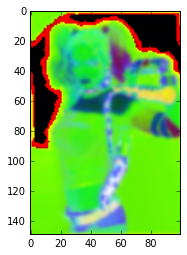

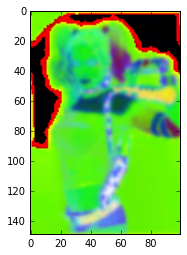

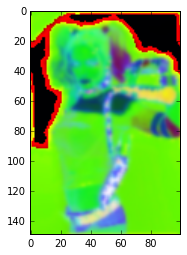

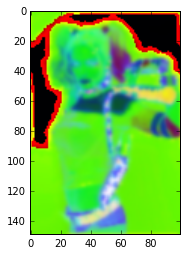

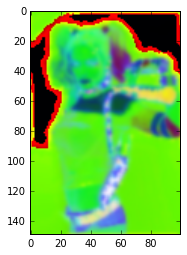

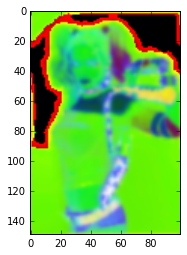

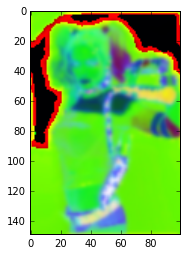

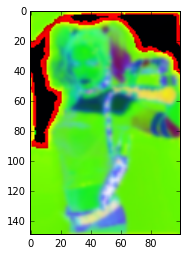

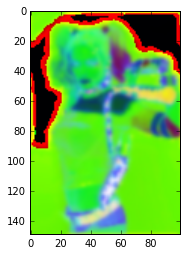

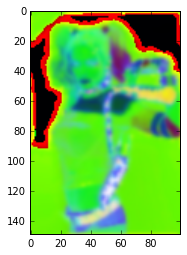

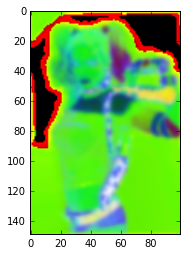

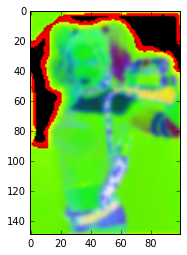

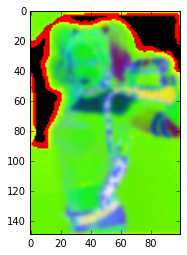

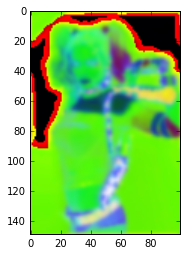

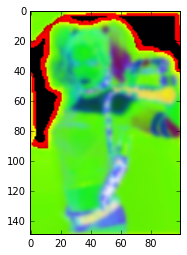

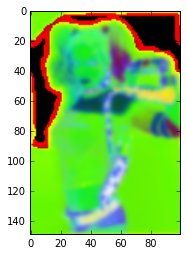

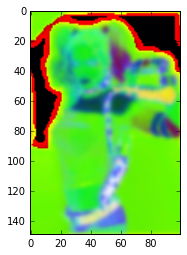

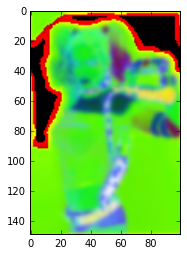

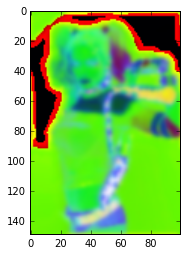

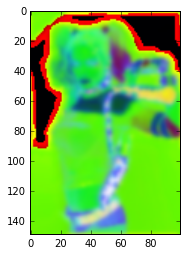

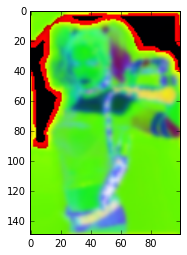

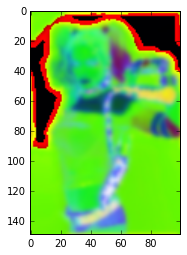

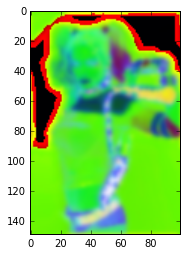

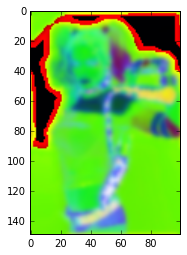

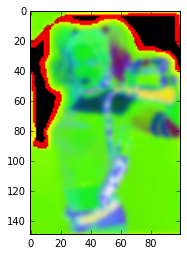

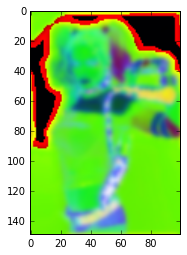

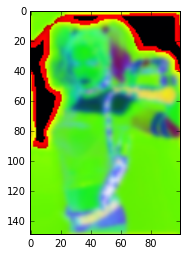

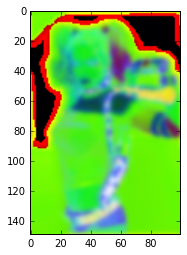

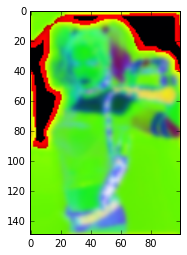

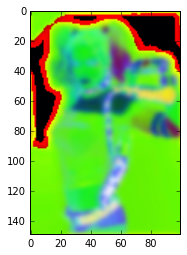

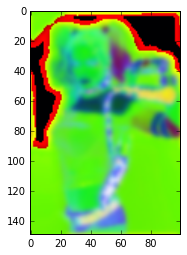

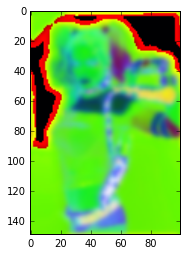

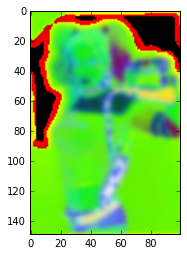

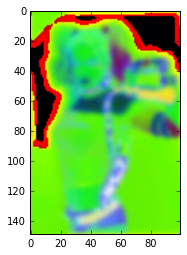

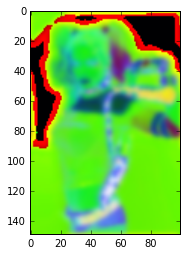

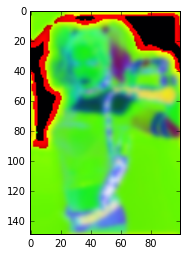

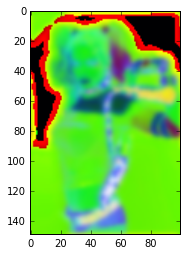

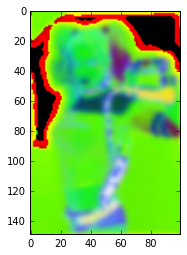

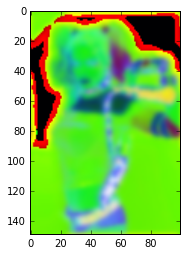

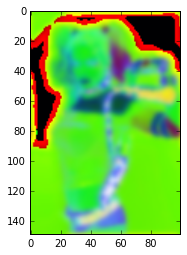

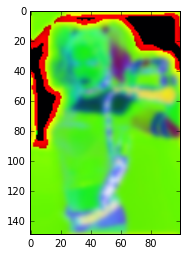

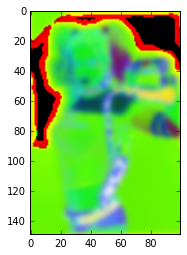

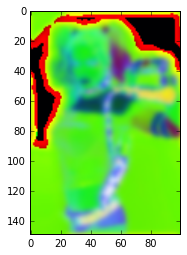

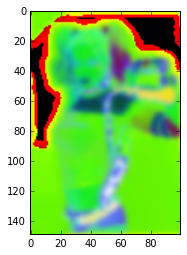

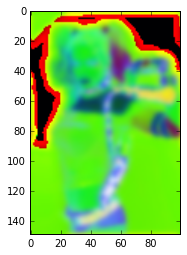

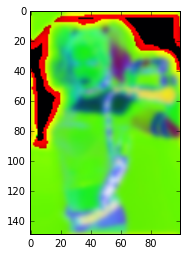

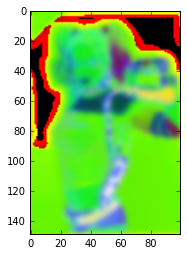

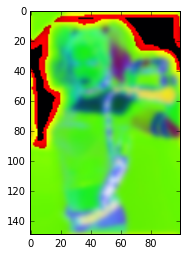

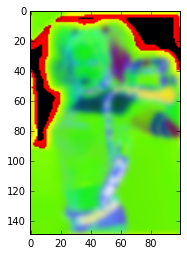

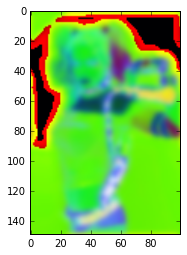

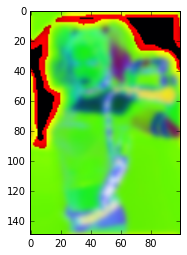

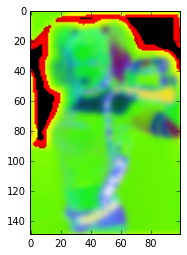

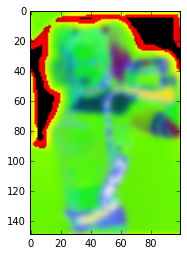

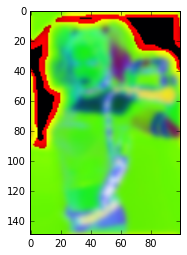

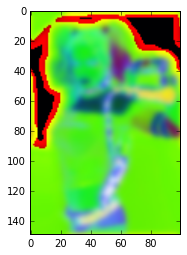

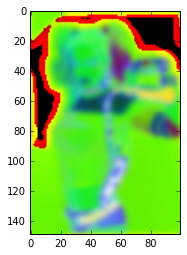

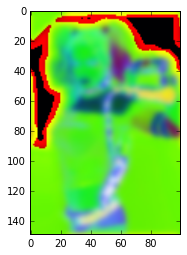

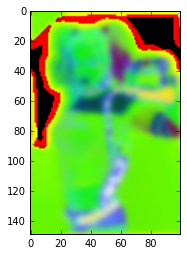

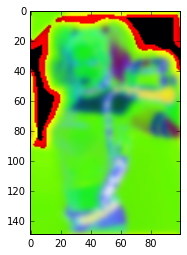

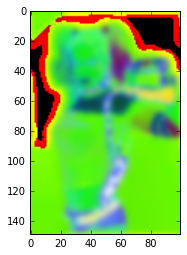

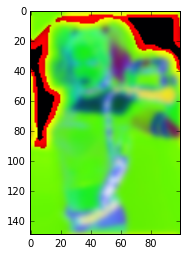

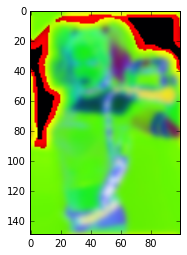

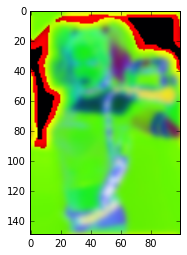

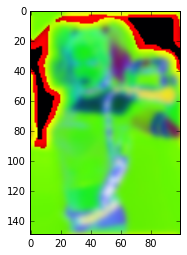

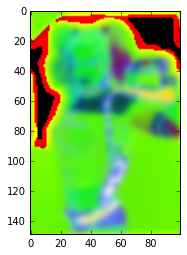

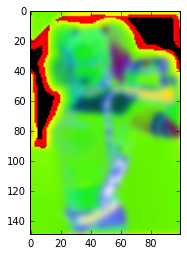

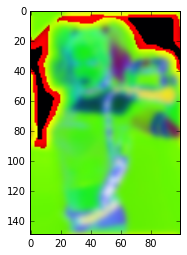

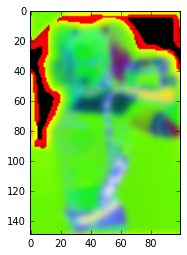

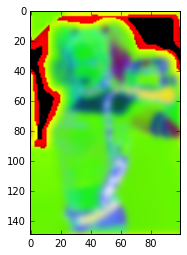

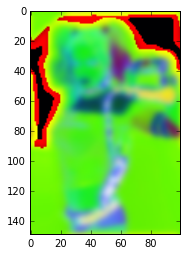

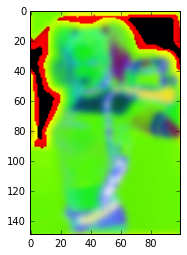

KeyboardInterrupt: 

In [5]:
for i in U:
    plt.imshow(i,cmap='gray')
    plt.show()

<IPython.core.display.Javascript object>


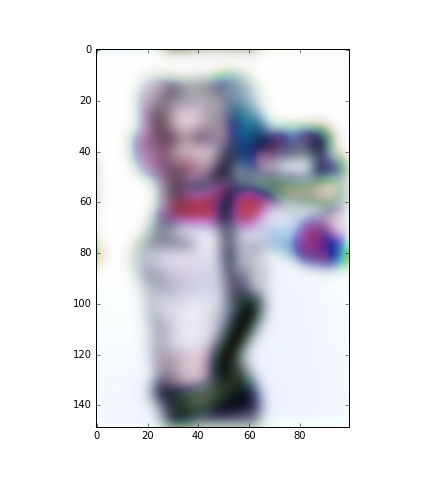

In [12]:

#import matplotlib.animation as animation
%matplotlib notebook


fig = plt.figure()

im = plt.imshow(Image.fromarray(U[0].astype(np.int8),"HSV"), animated=True)

i=0
def updatefig(*args):
    global i
    im.set_array(Image.fromarray(U[i].astype(np.int8),"HSV"))
    i+=1
    return im,

ani = animation.FuncAnimation(fig, updatefig, interval=50, blit=True)
plt.show()

<IPython.core.display.Javascript object>


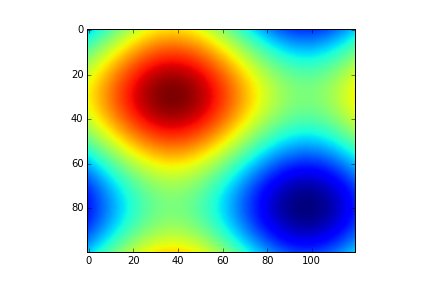

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook



fig = plt.figure()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

im = plt.imshow(f(x, y), animated=True)


def updatefig(*args):
    global x, y
    x += np.pi / 15.
    y += np.pi / 20.
    im.set_array(f(x, y))
    return im,

ani = animation.FuncAnimation(fig, updatefig, interval=20, blit=True)
plt.show()